In [111]:
import pandas as pd

In [112]:
df = pd.read_csv('players_22.csv')
df.isnull().sum()

/tmp/ipykernel_32858/4277909353.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('players_22.csv')


sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64

In [113]:
df.keys()

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [114]:
len(df.keys())

110

In [115]:
len(df)

19239

In [116]:
df = df[['short_name','overall','potential','value_eur']]
df

,short_name,overall,potential,value_eur
0,L. Messi,93,93,78000000.0
1,R. Lewandowski,92,92,119500000.0
2,Cristiano Ronaldo,91,91,45000000.0
3,Neymar Jr,91,91,129000000.0
4,K. De Bruyne,91,91,125500000.0
...,...,...,...,...
19234,Song Defu,47,52,70000.0
19235,C. Porter,47,59,110000.0
19236,N. Logue,47,55,100000.0
19237,L. Rudden,47,60,110000.0


In [117]:
len(df.keys())

4

In [118]:
df.isnull().sum()

short_name     0
overall        0
potential      0
value_eur     74
dtype: int64

In [119]:
df = df.fillna(df.mode().iloc[0])
# df['values'] = df['values'].fillna(df['values'].mode().iloc[0])
df.isnull().sum()
df.head()

,short_name,overall,potential,value_eur
0,L. Messi,93,93,78000000.0
1,R. Lewandowski,92,92,119500000.0
2,Cristiano Ronaldo,91,91,45000000.0
3,Neymar Jr,91,91,129000000.0
4,K. De Bruyne,91,91,125500000.0


In [120]:
import matplotlib.pyplot as plt

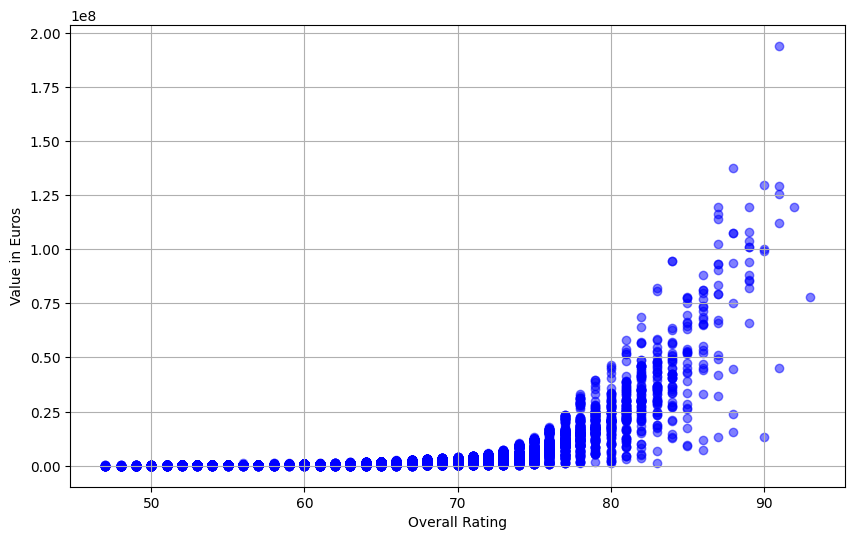

In [121]:
plt.figure(figsize=(10, 6))

plt.scatter(df['overall'], df['value_eur'], color='b', alpha=0.5)
plt.xlabel('Overall Rating')
plt.ylabel('Value in Euros')
plt.grid(True)


In [122]:
from sklearn.preprocessing import MinMaxScaler

In [123]:
scaler = MinMaxScaler()

scaler.fit(df[['overall']])
df['overall'] = scaler.transform(df[['overall']])

scaler.fit(df[['potential']])
df['potential'] = scaler.transform(df[['potential']])

scaler.fit(df[['value_eur']])
df['value_eur'] = scaler.transform(df[['value_eur']])

df.head()


,short_name,overall,potential,value_eur
0,L. Messi,1.000000,0.956522,0.402034
1,R. Lewandowski,0.978261,0.934783,0.615962
2,Cristiano Ronaldo,0.956522,0.913043,0.231923
3,Neymar Jr,0.956522,0.913043,0.664933
4,K. De Bruyne,0.956522,0.913043,0.646891


In [124]:
from sklearn.cluster import KMeans

In [125]:
km = KMeans(n_clusters=3)
pred_k = km.fit_predict(df[['overall','potential','value_eur']])
pred_k

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [126]:
df['cluster'] = pred_k
df.head()

,short_name,overall,potential,value_eur,cluster
0,L. Messi,1.000000,0.956522,0.402034,1
1,R. Lewandowski,0.978261,0.934783,0.615962,1
2,Cristiano Ronaldo,0.956522,0.913043,0.231923,1
3,Neymar Jr,0.956522,0.913043,0.664933,1
4,K. De Bruyne,0.956522,0.913043,0.646891,1


In [127]:
cluster_names = {
    0: 'Cluster 1',
    1: 'Cluster 2',
    2: 'Cluster 3',
}
# Map cluster labels to cluster names
df['Cluster_Name'] = df['cluster'].map(cluster_names)
df

,short_name,overall,potential,value_eur,cluster,Cluster_Name
0,L. Messi,1.000000,0.956522,0.402034,1,Cluster 2
1,R. Lewandowski,0.978261,0.934783,0.615962,1,Cluster 2
2,Cristiano Ronaldo,0.956522,0.913043,0.231923,1,Cluster 2
3,Neymar Jr,0.956522,0.913043,0.664933,1,Cluster 2
4,K. De Bruyne,0.956522,0.913043,0.646891,1,Cluster 2
...,...,...,...,...,...,...
19234,Song Defu,0.000000,0.065217,0.000314,0,Cluster 1
19235,C. Porter,0.000000,0.217391,0.000521,0,Cluster 1
19236,N. Logue,0.000000,0.130435,0.000469,0,Cluster 1
19237,L. Rudden,0.000000,0.239130,0.000521,0,Cluster 1


In [128]:
km.cluster_centers_

array([[0.26056048, 0.35859949, 0.00192813],
       [0.60692059, 0.64421859, 0.05259432],
       [0.42329207, 0.49220599, 0.00648832]])

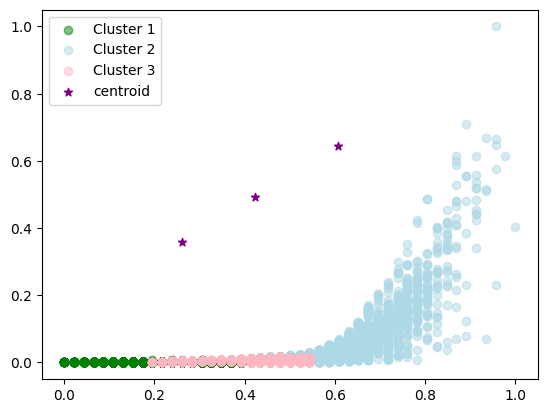

In [129]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.overall,df1['value_eur'],color='green',alpha=0.5,label='Cluster 1')
plt.scatter(df2.overall,df2['value_eur'],color='lightblue',alpha=0.5,label='Cluster 2')
plt.scatter(df3.overall,df3['value_eur'],color='lightpink',alpha=0.5,label='Cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend() 

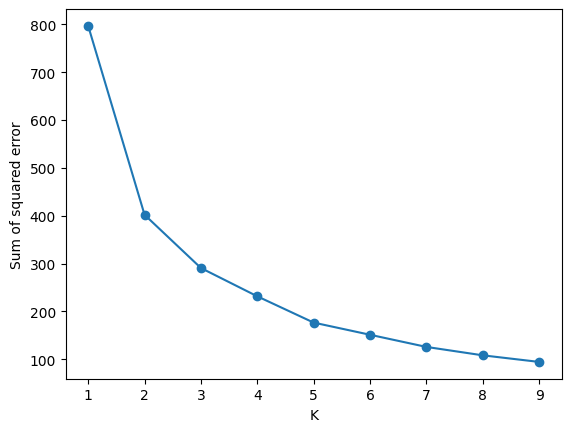

In [130]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['overall','value_eur','potential']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)


In [131]:
df[['Cluster_Name','short_name']]

,Cluster_Name,short_name
0,Cluster 2,L. Messi
1,Cluster 2,R. Lewandowski
2,Cluster 2,Cristiano Ronaldo
3,Cluster 2,Neymar Jr
4,Cluster 2,K. De Bruyne
...,...,...
19234,Cluster 1,Song Defu
19235,Cluster 1,C. Porter
19236,Cluster 1,N. Logue
19237,Cluster 1,L. Rudden
